# Juego de suma 0 entre 2 personas

## Matriz de pagos: es lo que B tiene que pagar a A en cada caso
|a/b|  1|  2|  3|
|--|--|--|--| 
|1|    3|  2| -3|
|2|   0| -4| 6|
|3|    0| -5|  5|

## Cual es el valor esperado del pago que B hará al jugador A ?
Probabilidades de A  1(2/3) 2(1/3) 3 (0)
Probabilidades de B  1(0)   2(3/5) 3 (2/5)

Se tienen 3 opciones a elegir (1,2,3) por cada jugador
Existen 9 combinaciones posibles, pero no todas aplican, así que la matriz quedaría:

Nueva matriz de pagos: es lo que B tiene que pagar a A en cada caso

|a/b|  1|  2|  3|
|--|--|--|--| 
|1    |0|  2| -3|
|2    |0| -4|  6|
|3    |0|  0|  0|

Quedamos con solo 4 opciones (A,B) (1,2) (1,3) (2,2) (2,3)

In [1]:
payments = {
    "12":2,
    "13":-3,
    "22":-4,
    "23":6
    }

In [2]:
# Selecciones de cada jugador segun su probabilidad

options_a = [1,1,2]
options_b = [2,2,2,3,3]

In [3]:
# funciones

import random
import time
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
random.seed(time.process_time())

list_union = [] # Union de valores obtenidos

# Esta funcion brinda un numero aleatorio para A y otro para B entre las opciones y regresa ambas selecciones

def randomizer(test_number):
    for num in range(0, test_number):
        randNumber_a = random.randint(0, 2)
        randNumber_b = random.randint(0, 4)
        selected_a = options_a[randNumber_a]
        selected_b = options_b[randNumber_b]
        list_union.append(str(selected_a)+str(selected_b))
    return list_union

# Esta funcion obtiene el pago que se debe proporcionar segun la opcion elegida en la función randomizer

def paymentSum(resultList,payments):
    totalPayment = 0
    list_payments = []
    for i in resultList:
        totalPayment += payments[i]
        list_payments.append(payments[i])
    return totalPayment, list_payments

In [4]:
resultList = []
list_payments = []

In [5]:
#test
test_number = 1000000
resultList = randomizer(test_number)
print(len(resultList))
totalPayment, list_payments = paymentSum(resultList, payments)
print(len(list_payments))
paymentPerPlay = totalPayment/test_number

print(f'El promedio de pago por cada juego (jugando {test_number} veces) es de {paymentPerPlay}')


1000000
1000000
El promedio de pago por cada juego (jugando 1000000 veces) es de -0.003649


## Vemos que el promedio por juego tiende a ser 0

(array([200783., 266359.,      0.,      0.,      0.,      0., 399647.,
             0.,      0., 133211.]),
 array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <BarContainer object of 10 artists>)

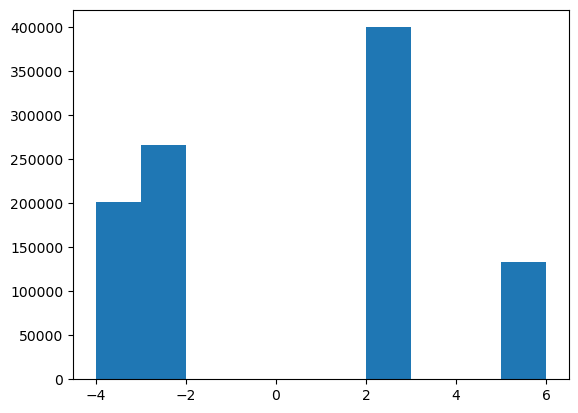

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(list_payments)

## Si corro solo 1 juego Solo obtengo 4 valores de pago
## Para poder hacer una distribución normal de pagos, calcularé la media obtenida de cada 5,000 juegos 

In [32]:
total_payments_in_mult_games = []

# for i in list_payments:
valor_esperado = np.mean(list_payments)
sections = int(len(list_payments)/200)
for i in range(0,len(list_payments),sections):
    mean2 = np.mean(list_payments[i:i+sections])
    total_payments_in_mult_games.append(mean2)


(array([ 3.,  2.,  0.,  0.,  2.,  0.,  2.,  2.,  2.,  4.,  0.,  2.,  5.,
         3.,  8.,  7.,  6.,  4.,  9., 11., 13.,  9.,  7., 11.,  9., 12.,
         8.,  7.,  4.,  6.,  5.,  5.,  4.,  7.,  5.,  5.,  1.,  2.,  1.,
         3.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.1296 , -0.12408, -0.11856, -0.11304, -0.10752, -0.102  ,
        -0.09648, -0.09096, -0.08544, -0.07992, -0.0744 , -0.06888,
        -0.06336, -0.05784, -0.05232, -0.0468 , -0.04128, -0.03576,
        -0.03024, -0.02472, -0.0192 , -0.01368, -0.00816, -0.00264,
         0.00288,  0.0084 ,  0.01392,  0.01944,  0.02496,  0.03048,
         0.036  ,  0.04152,  0.04704,  0.05256,  0.05808,  0.0636 ,
         0.06912,  0.07464,  0.08016,  0.08568,  0.0912 ,  0.09672,
         0.10224,  0.10776,  0.11328,  0.1188 ,  0.12432,  0.12984,
         0.13536,  0.14088,  0.1464 ]),
 <BarContainer object of 50 artists>)

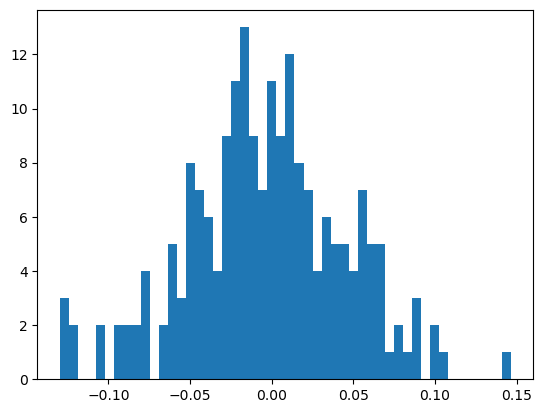

In [29]:
# Muestro la distribución
plt.hist(total_payments_in_mult_games, bins=50)

# Calculo los limites para que el valor de pago obtenido esté dentro de la campana con un valor de confianza del 90 % (+-1.645)

In [35]:
valor_confianza = 1.645
desv_std = np.std(total_payments_in_mult_games)
desv_std_media = desv_std/np.sqrt(len(total_payments_in_mult_games))

limite_inf = valor_esperado - desv_std_media * valor_confianza
limite_sup = valor_esperado + desv_std_media * valor_confianza

print(f'La desviación estandar es {desv_std}')
print(f'La desviación estandar de la media es {desv_std_media}')
print(f'El limite inferior es {limite_inf}')
print(f'El limite superior es {limite_sup}')

La desviación estandar es 0.04861377787212181
La desviación estandar de la media es 0.003437513199247386
El limite inferior es -0.00930370921276195
El limite superior es 0.0020057092127619505
